In [2]:
from tensorboard.backend.event_processing import event_accumulator
from collections import  namedtuple
import numpy as np

In [3]:
events = event_accumulator.EventAccumulator('experiments/torch/DDDQN_LIFE_ATTENTION/summary/')

In [4]:
events.Reload()

In [5]:
events.scalars.Keys()

['epsilon', 'episode_reward', 'episode_length']

In [6]:
reward = events.scalars.Items('episode_reward')
episode_length = events.scalars.Items('episode_length')
EpisodeStats = namedtuple("Stats",["episode_lengths", "episode_rewards"])
stats = EpisodeStats(
    episode_lengths=np.zeros(len(reward)),
     episode_rewards=np.zeros(len(reward)))
for t in range(len(reward)):
    stats.episode_lengths[t] = episode_length[t][2]
    stats.episode_rewards[t] = reward[t][2]

In [7]:
import pickle
res = {
    'name':'TorchDDDQN_life_ACE',
    'reward':reward,
    'episode_length':episode_length
}
with open('da/' + res['name'],'wb') as f:
    pickle.dump(res,f)

In [44]:
import matplotlib
import numpy as np
import pandas as pd
from collections import namedtuple
from matplotlib import pyplot as plt

In [52]:
def plot_episode_stats(stats, smoothing_window=10, noshow=False):
    # Plot the episode length over time
    fig1 = plt.figure(figsize=(10,5))
    plt.plot(stats.episode_lengths)
    plt.xlabel("Episode")
    plt.ylabel("Episode Length")
    plt.title("Episode Length over Time")
    if noshow:
        plt.close(fig1)
    else:
        plt.show(fig1)

    # Plot the episode reward over time
    fig2 = plt.figure(figsize=(10,5))
    rewards_smoothed = pd.Series(stats.episode_rewards).rolling(smoothing_window, min_periods=smoothing_window).mean()
    plt.plot(rewards_smoothed)
    plt.xlabel("Episode")
    plt.ylabel("Episode Reward (Smoothed)")
    plt.title("Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))
    if noshow:
        plt.close(fig2)
    else:
        plt.show(fig2)


    return fig1, fig2

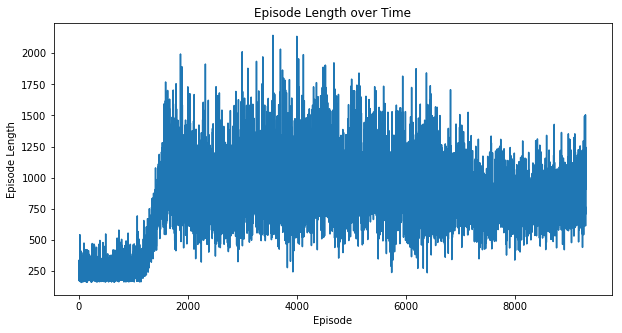

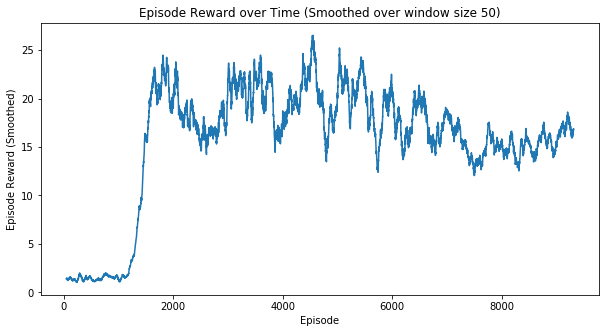

(<Figure size 720x360 with 1 Axes>, <Figure size 720x360 with 1 Axes>)

In [55]:
plot_episode_stats(stats,50)